In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# STEP #1: LIBRARIES IMPORT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [3]:
IceCream = pd.read_csv("/content/drive/MyDrive/machine learning/datasets/IceCreamData.csv")

In [4]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [5]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

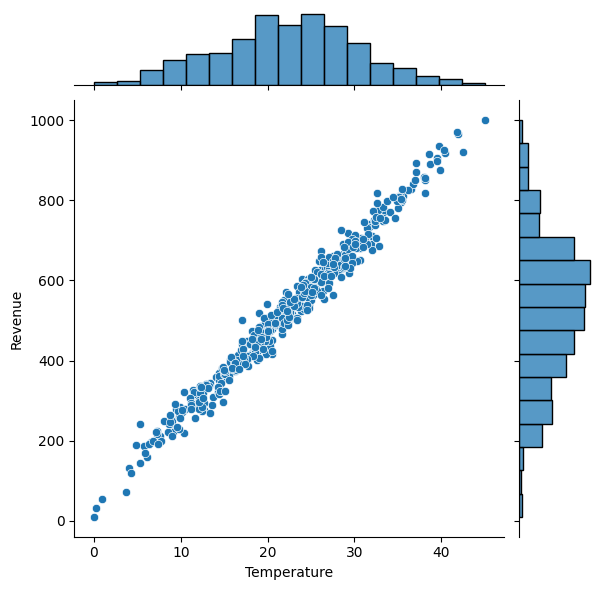

In [8]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

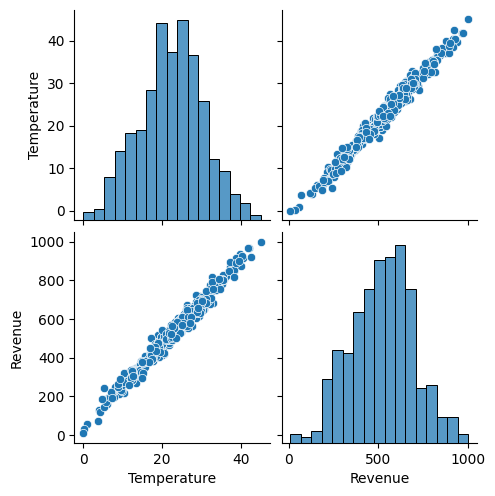

In [9]:
sns.pairplot(IceCream)

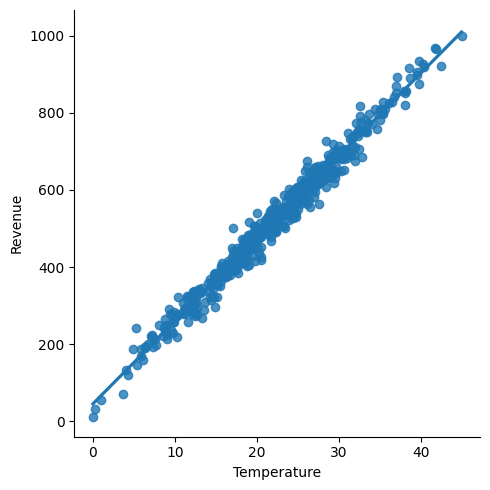

In [10]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [11]:
y = IceCream['Revenue']

In [12]:
X = IceCream[['Temperature']]

In [13]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [16]:
X_train.shape

(375, 1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression(fit_intercept =True)

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.43983497]
Linear Model Coefficient (b):  44.4287791802862


# STEP#6: TEST THE MODEL

In [21]:
y_predict = regressor.predict( X_test)
y_predict

array([454.22234116, 796.85540419, 523.8749956 , 497.43374539,
       393.95286223, 295.15773691, 677.07960112, 284.29243912,
       605.8945319 , 169.25862382, 534.15685673, 467.96646486,
       291.0618702 , 634.65097406, 516.31685217, 228.53153025,
       658.66272585, 713.97313857, 565.59462811, 387.91584808,
       502.34129145, 439.77894224, 511.30151047, 838.93637403,
       468.40470409, 651.93428087, 570.32333315, 189.68808444,
       433.53932229, 492.49380652, 701.24470776, 201.69950959,
        44.42877918, 469.99322563, 745.86258166, 749.65124578,
       689.36237044, 640.03810458, 450.76769467, 380.20798921,
       246.03782159, 366.65045511, 611.64214237, 600.47894215,
       862.2798586 , 601.97578588, 440.27045367, 422.56179275,
       435.3461751 , 441.19932123, 257.84855074, 620.29680537,
       311.63209839, 626.07889238, 283.11215284, 370.9829818 ,
       697.41624852, 199.2967935 , 546.27650579, 569.56488484,
       524.6377158 , 368.23293254, 440.53046998, 605.48

In [22]:
y_test

424    445.772400
346    807.541287
498    566.217304
410    493.226636
60     381.564135
          ...    
394    300.932273
52     666.136835
369    545.903929
429    521.775445
318    639.538012
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

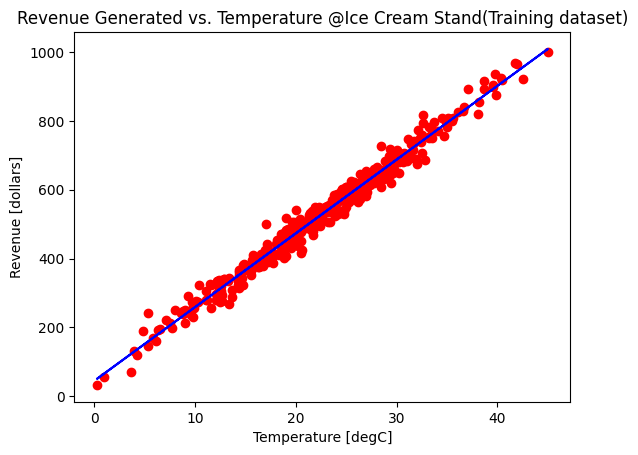

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

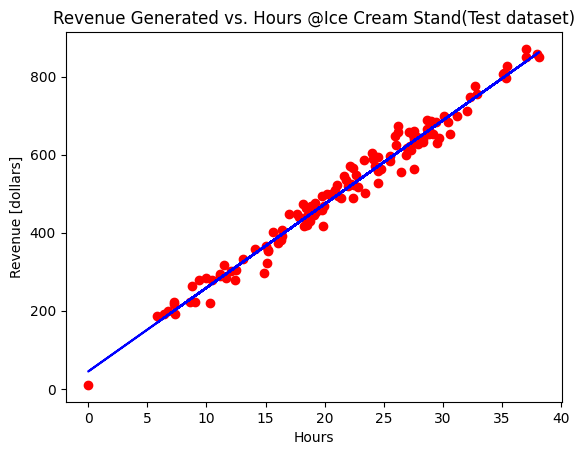

In [24]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [25]:
y_predict = regressor.predict([[30]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([687.62382838])